In [26]:
from sklearn.model_selection import train_test_split
import shap
import xgboost
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
# Load your saved data (if needed)
X = pd.read_pickle("outputs/X.pkl")
y = pd.read_pickle("outputs/y.pkl")


In [28]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:

# Drop non-numeric column if still present
X_train = X_train.drop(columns=["customer_unique_id"], errors="ignore")
X_test = X_test.drop(columns=["customer_unique_id"], errors="ignore")


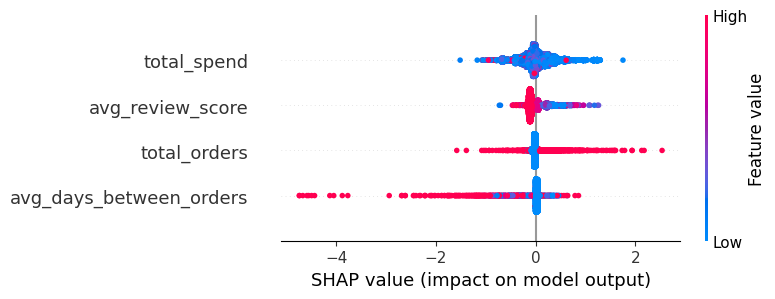

In [30]:

# Train XGBoost again
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)



In [31]:
# Select one test sample (e.g., the 10th one)
sample_index = 12
sample = X_test.iloc[[sample_index]]

# Compute SHAP values for the sample
shap_value = explainer(sample)

# Force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_value.values, sample)


In [32]:
import shap
import xgboost
import pandas as pd

# Train XGBoost model
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
# Use TreeExplainer (better compatibility with XGBoost)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)


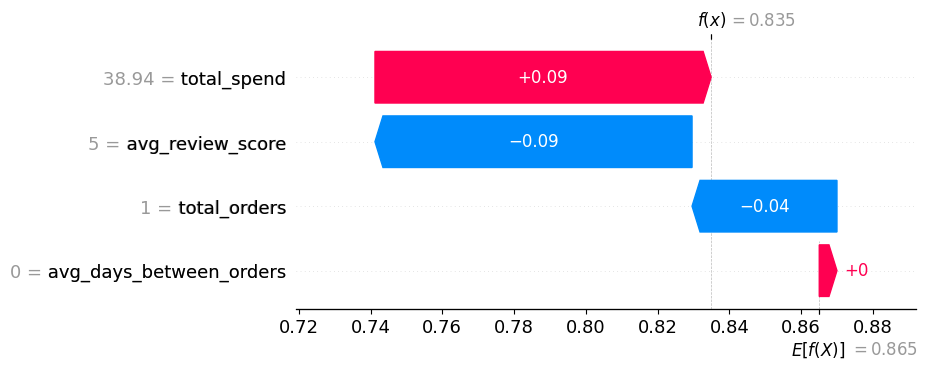

In [34]:
shap.plots.waterfall(shap_values[sample_index])


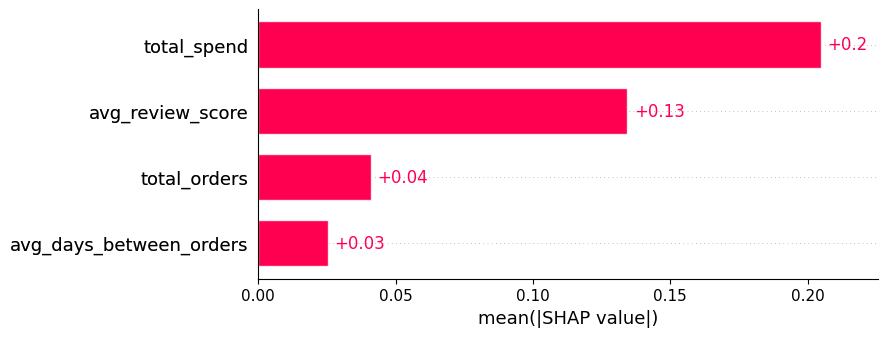

In [35]:
shap.plots.bar(shap_values)